# Chapter 1 - The Machine Learning Landscape


Machine Learning (ML) is a branch of Artificial Intelligence (AI) that allows computers to “learn” from data without being explicitly programmed for each task.


**TRAINING SET.** It is a set of training data, meaning the data the system uses to learn.

**TRAINING INSTANCE.** It is an instance or training sample (each individual example).

**MODEL.** It is the part of the system that learns and makes predictions.


# Types of ML systems


## Training Supervision

ML systems can be classified according to the amount and type of
supervision they get during training.


### Supervised learning


This is a way of teaching a computer by giving it examples where we already know the correct answer.

You give the program a **training set** of data. Each example in the training set has:

- the input (what you want to analyze, called **features**, **predictors**, or **attributes**).

- the output (the correct answer, called a **label** in classification, or **target** in regression).

In supervised learning, there are two main types of tasks:

- **Classification**: The output is a category. (e.g. classify an email as spam or not spam)
- **Regression**: The output is a continuous number. (e.g. predict the price of a car given its mileage, age, and brand)
  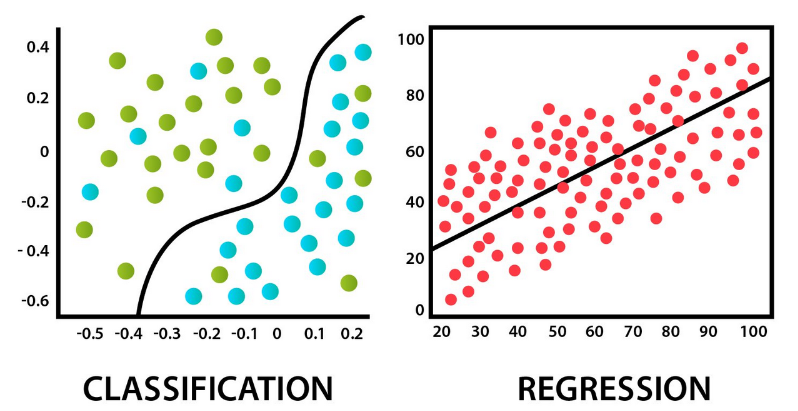


### Unsupervised learning


The algorithm learns patterns from unlabeled data, without knowing the correct answers.

In unsupervised learning, the main tasks are:

- **Clustering**: Finds groups of similar items.

- **Visualization**: Converts complex data into easy-to-understand 2D or 3D plots, preserving patterns.

- **Dimensionality Reduction**: Simplifies data with too many features (**dimensions**) by merging correlated features, reducing noise.

- **Anomaly Detection**: Identifies unusual or rare cases compared to normal ones.

- **Novelty Detection**: Detects completely new patterns not seen in clean training data.

- **Association Rule Learning**: Finds relationships between items in data.


### Semi-supervised learning


Type of machine learning that uses both labeled and unlabeled data to train a model.

It’s useful when labeling data is expensive or time-consuming.

How it works:

1. Use unsupervised learning (e.g., clustering) to group similar examples.

2. Assign labels to some groups based on the small labeled set.

3. Train a supervised model on the now-labeled dataset.


### Self-supervised learning


Self-supervised learning is a way to train a machine learning model using a dataset that has no labels at all at first, but then we create our own labels automatically.


### Reinforcement learning


Reinforcement Learning (RL) is a type of machine learning where an **agent** learns by interacting with an **environment**.

The agent chooses **actions**, observes the outcome, and receives **rewards** (positive feedback) or **penalties** (negative rewards).

The goal of the agent is to learn the best **policy** — a strategy that maximizes the total rewards over time.

A policy defines which action the agent should take in each situation.


---


## Batch vs. Online Learning


### Batch learning


In batch learning, the system is trained all at once using all available data. After training, the model is deployed and no longer learns; it only applies what it learned. This is also called **offline learning**.

The model’s performance degrades over time (**model rot**, **data drift**), as the real world changes.

Retraining requires the full dataset (old + new data), which is time- and resource-intensive.


### Online learning


Online learning is a training method where the model learns incrementally, processing one data instance at a time or in small batches (**mini-batches**).

Can adapt quickly to new data, works with limited computing resources and handles datasets too large to fit into memory (**out-of-core learning**).

Out-of-core learning is a training on massive datasets by loading and processing small chunks sequentially. Usually done offline, despite the name online learning.

**LEARNING RATE.** Controls how fast the model adapts.

- High learning rate: adapts quickly but forgets old data and is more sensitive to noise.

- Low learning rate: adapts slowly but retains stability and resists noise/outliers.


---


## Instance-Based vs. Model-Based Learning


### Instance-based learning


Instance-based learning is a simple machine learning approach where the system memorizes the training examples and makes predictions by comparing new data to these stored examples.
It does not build a general model or learn rules — instead, it relies on a similarity measure to decide how close a new instance is to the known examples.


### Model-based learning


Instead of just memorizing examples (like instance-based learning), we try to build a model that explains the relationship between the input and the output.
We then use this model to make predictions for new data.

**Model selection**: Choosing the type and structure of the model to use.

**Model parameters**: The internal values that define how the model behaves.

**Training the model**: Finding the optimal parameter values that minimize the cost function.

**Performance measure**: A metric to evaluate how good or bad the model is.

- Utility function: Measures goodness.

- Cost function: Measures error.

**Inference**: Using the trained model to make predictions on new data.

Machine learning workflow:

1. Study and analyze data.

2. Select a model.

3. Train the model.

4. Make predictions (inference).

5. Evaluate and improve the model.


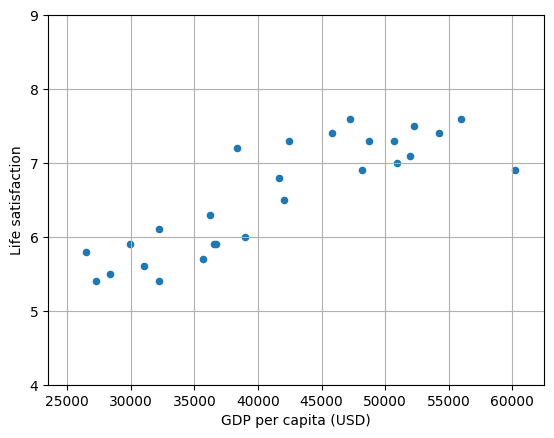

Prediction: [[6.30165767]]


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind="scatter", grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(f"Prediction: {model.predict(X_new)}")

**k-nearest neighbors (k-NN)**: An instance-based learning algorithm that averages the outcomes of the k closest instances.


In [2]:
# Select a 3-Nearest Neighbors regression model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(f"Prediction: {model.predict(X_new)}")  # outputs [[6.33333333]]

Prediction: [[6.33333333]]


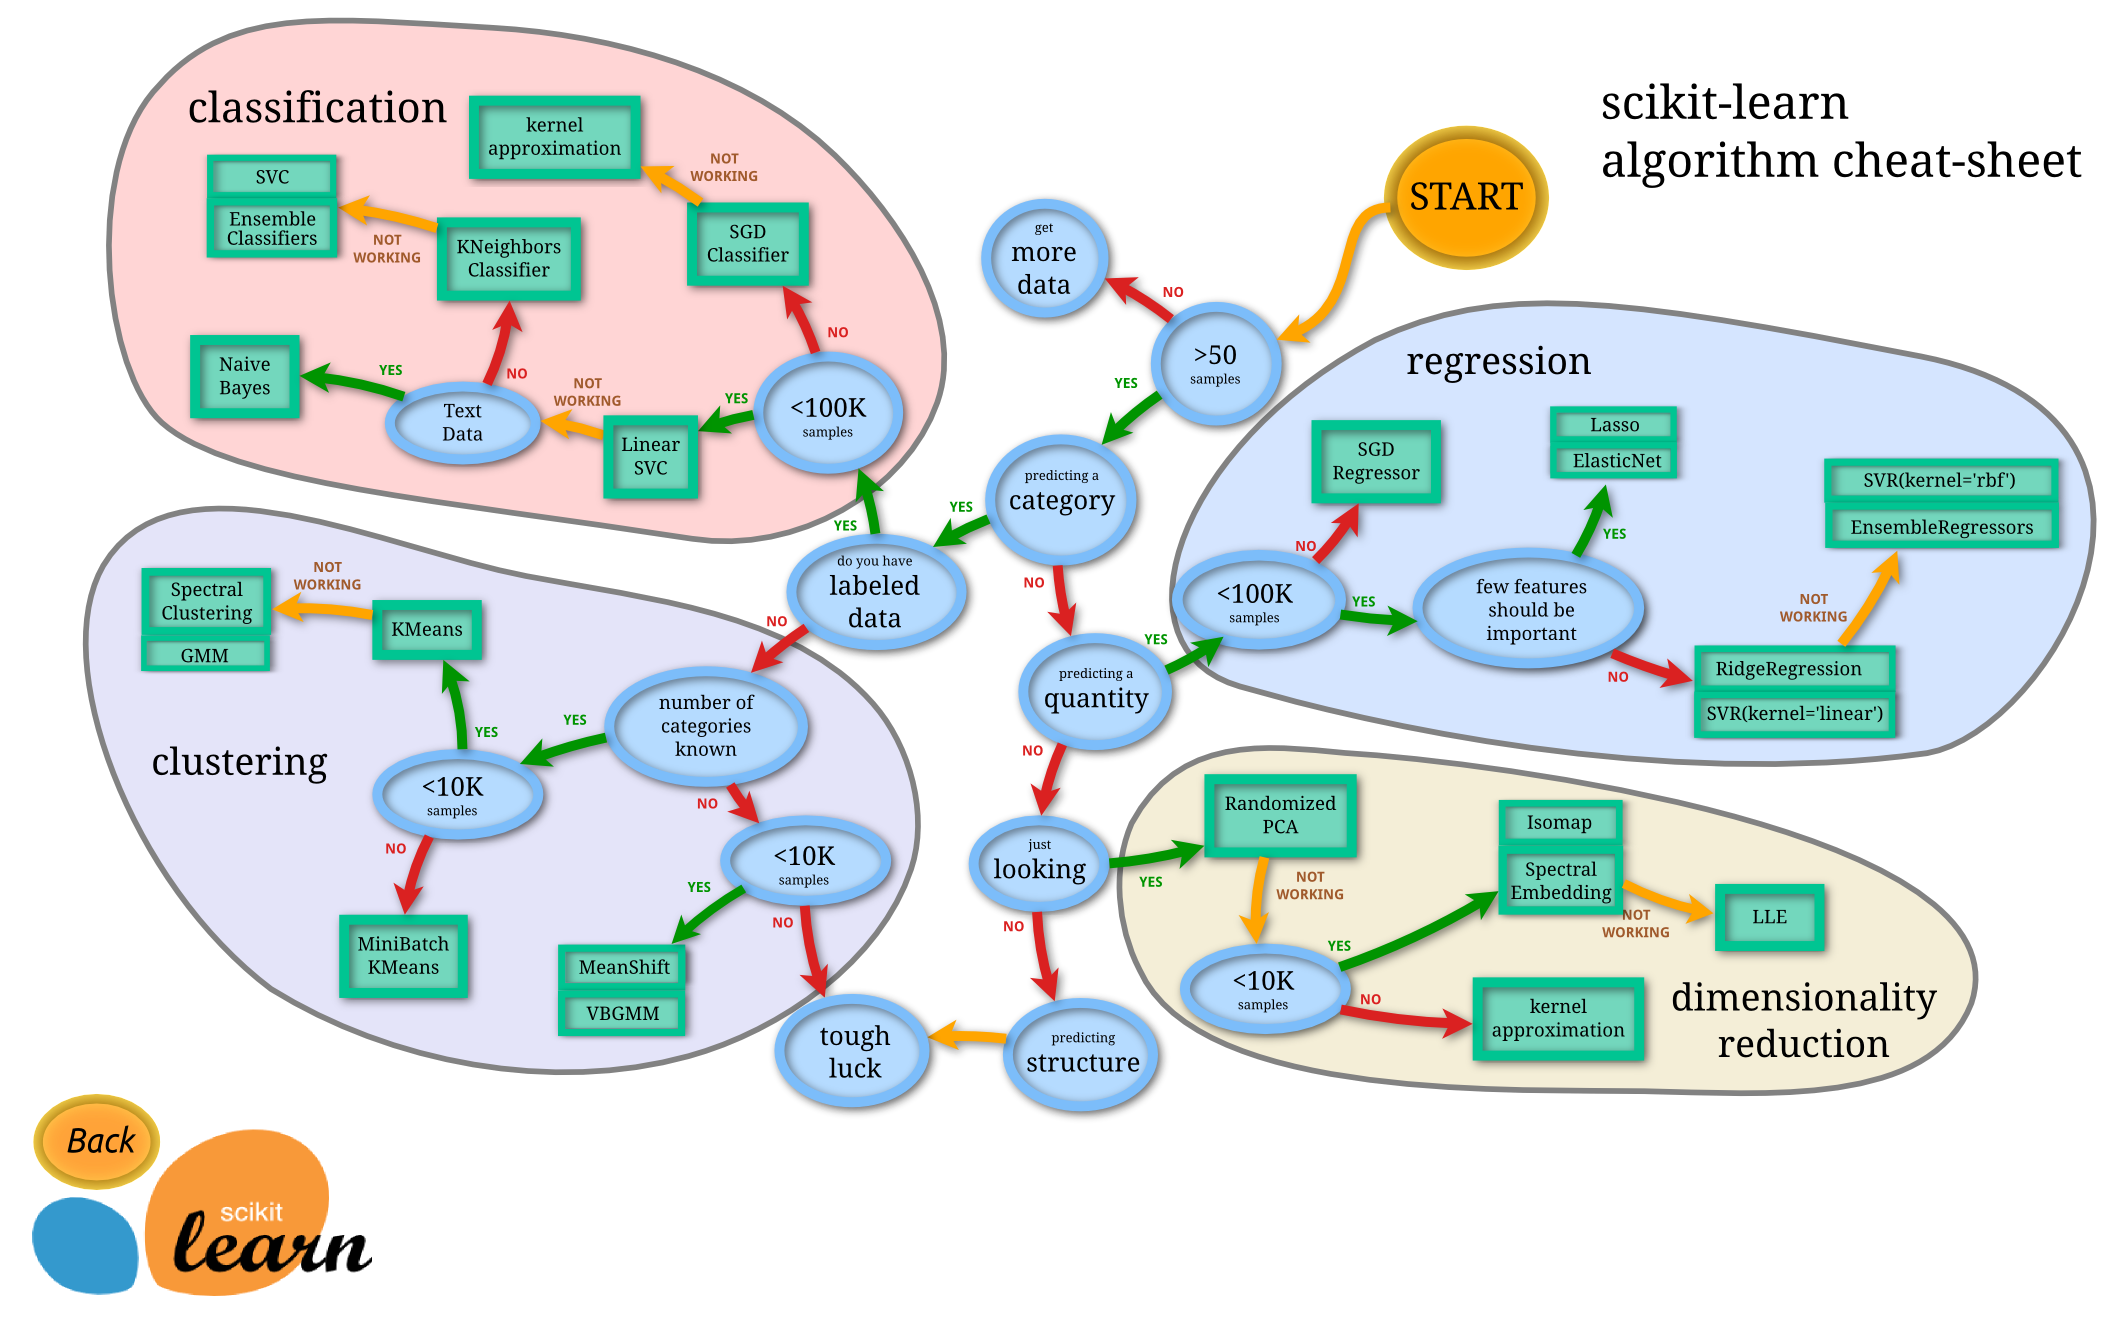


---


# Main challenges of ML


### Nonrepresentative Training Data


**Representativeness**. The training data must accurately reflect the diversity of the real-world cases you want the model to predict.

**Generalization**. A model trained on nonrepresentative data will fail to generalize to new, unseen situations.

**Sampling Bias**. A flaw in the way training data is collected, causing it to systematically favor certain cases and ignore others.

**Nonresponse Bias**. A specific type of sampling bias where certain groups are underrepresented because they did not respond or participate.

**Sampling Noise**. Variability or distortion caused by having too small a sample, making it unrepresentative just by chance.


---


### Poor-Quality Data


Errors, outliers, and noise in training data obscure patterns and reduce model performance.

Data cleaning is a crucial and time-consuming step for data scientists.

Examples of Data Cleaning

Outliers:

- Discard clearly erroneous instances.

- Alternatively, correct errors manually.

Missing Values:

- Ignore the problematic feature.

- Exclude instances with missing data.

- Fill in missing values (e.g., with median).

- Train two models: one with and one without the feature.


---


### Irrelevant Features


Machine learning systems depend on relevant features in the training data.
Too many irrelevant features can degrade model performance.

**Feature Engineering**. Critical for building effective models. Involves crafting a good set of features through:

- **Feature selection:** Choosing the most useful existing features.
- **Feature extraction:** Combining or transforming features (e.g., via dimensionality reduction).
- **Creating new features:** Collecting additional, relevant data.


---


### Overfitting the Training Data


**OVERFITTING**. Model performs well on training data but fails to generalize to unseen data. Overgeneralizing based on limited or noisy examples (e.g., assuming all taxi drivers are thieves after one bad experience).

Causes of Overfitting:

- Model complexity too high for:
  - Size of the training data.
  - Noise present in the data.
- Detecting patterns in noise rather than true signal. A model finds irrelevant correlations (e.g., countries with a “w” in their name have high satisfaction).

Solutions to Overfitting:

- Simplify the model:
  - Use fewer parameters.
  - Reduce number of input features.
  - Add constraints.
- Gather more training data.
- Reduce noise:
  - Correct errors.
  - Remove outliers.

**REGULARIZATION.** Constraining the model to be simpler, reducing overfitting risk (e.g., restricting parameter values to limit the model’s flexibility). Produces a simpler model that generalizes better, even if it fits training data less precisely. Trade-off: balance between training fit and simplicity.

**HYPERPARAMETERS.** A configuration variable set before training begins, which controls how the learning algorithm works. Unlike model parameters (like weights and biases) — which are learned from the training data — hyperparameters are not learned; you choose or tune them yourself.

Regularization Strength:

- Controlled by a hyperparameter (set before training).
- Larger value → stronger regularization → simpler, less overfitted model.
- Important to tune for optimal performance.


---


### Underfitting the Training Data


Happens when the model is too simple to capture the data’s complexity. Results in inaccurate predictions, even on training data.

How to Address Underfitting:

- Use a more powerful model with more parameters.

- Perform better feature engineering to improve input data.

- Relax model constraints, e.g., reduce regularization strength.


---


# Testing and Validation


Estimate how well a model performs on unseen data (generalization error).

Split data into:

- Training set — to train the model.
- Test set — to estimate generalization error.

Warning: Low training error & high generalization error → overfitting.

Common split: ~80% training / ~20% test, but depends on dataset size.


---


**Holdout Validation**

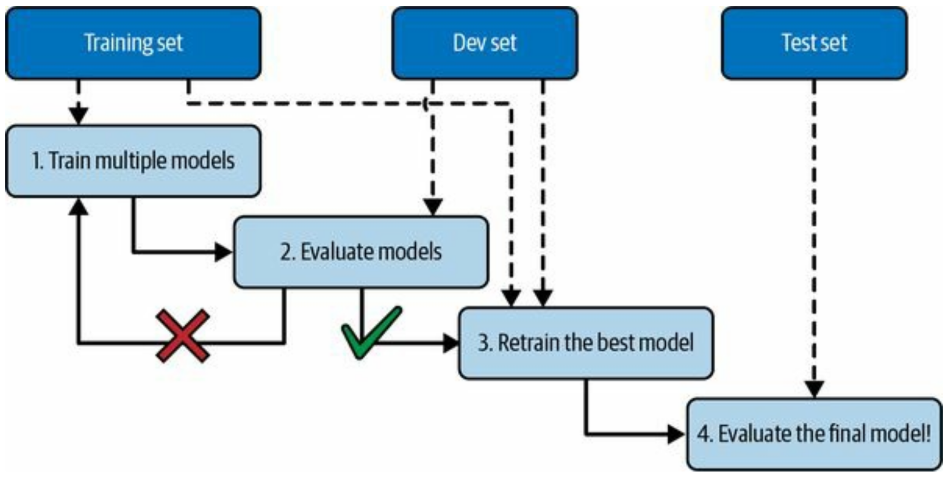

Split the training set into:

- Reduced **training set**: for training candidate models.

- **Validation set** (dev set): for model selection.

- Retrain the best candidate on the full training set (including the validation set).

- Evaluate final model on the **test set** to estimate generalization error.

Too small validation set → imprecise evaluations.

Too large validation set → smaller training set, leading to suboptimal final models.

**Cross-Validation**

- Uses multiple small validation sets in turns.

- Each model is trained on the remaining data and evaluated on each validation set.

- Final performance is averaged across all validations for a more reliable estimate.

- Drawback: Increased training time proportional to the number of validations.


---


Training data (e.g., web flower images) may not represent production data (e.g., mobile app photos).
Limited amount of representative production-like data (e.g., only ~1,000 real app photos).

Key Rule: Validation set and test set must only include data that is representative of production data.

Split representative data into:

- Validation (dev) set

- Test set

- Ensure no duplicates or near-duplicates appear in both.

Identifying the Cause of Poor Performance

Poor performance on validation set could stem from:

- Overfitting on training data.

- Data mismatch between training and production data.

Solution: Train-Dev Set

Hold out a train-dev set from the abundant training data.

Steps:

1. Train model on training set.

2. Evaluate on train-dev set:

   - If poor → likely overfitting. Fix: regularize, simplify, add data, clean data.

   - If good → evaluate on dev set.

     - If poor → likely data mismatch. Fix: preprocess training data to better match production data.

Final Evaluation: Once the model performs well on both train-dev and dev sets, evaluate it on the test set to estimate production performance.


---
